In [ ]:
'''
import os
# Function to rename multiple files

i = 16
path="images/new/"
for filename in os.listdir(path):
    my_dest ="f_" + str(i) + ".jpeg"
    my_source =path + filename
    my_dest =path + my_dest
    # rename() function will
      # rename all the files
    os.rename(my_source, my_dest)
    i += 1
'''

In [1]:
import numpy as np
import cv2
import os
import pandas as pd
import csv
import sklearn
import glob
from sklearn.model_selection import cross_val_score
import random 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lines = []
image_path = 'images/IMG/'

In [3]:
with open('images/train.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [4]:
from PIL import Image

images = []
labels = []

height = 200
width = 200
newsize = (200, 200)
dim = (width, height)

for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = 'images/IMG/' + filename
    image = cv2.imread(current_path)
    #image = Image.open(current_path)
    #image = image.resize(newsize)
    #img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    images.append(image)
    label = float(line[1])
    labels.append(label)
X_train = np.array(images)
y_train = np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (200, 200, 3)


In [6]:
print(len(X_train))

336


In [7]:
print(len(y_train))

336


In [8]:
print(len(X_valid))

84


In [9]:
print(len(y_valid)) #Dataset is shuffled

84


In [10]:
print(X_train[0])

[[[231 161  54]
  [232 161  53]
  [233 161  50]
  ...
  [237 212 186]
  [237 212 186]
  [237 212 186]]

 [[233 161  54]
  [233 161  53]
  [234 160  51]
  ...
  [239 214 188]
  [239 214 188]
  [239 214 188]]

 [[235 161  55]
  [234 161  54]
  [235 161  51]
  ...
  [239 216 190]
  [239 216 190]
  [239 216 190]]

 ...

 [[ 74  50  52]
  [ 73  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  50  52]
  [ 72  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  50  52]
  [ 72  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]]


In [11]:
print(y_train[0])

1.0


4.0


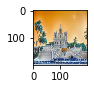

In [12]:
# Displaying a random image from the training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [13]:
# Shuffling the Dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
def normalization(x_label):
    return x_label / 255 * 0.8 + 0.1

X_train =  normalization(X_train)
X_valid = normalization(X_valid)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, ELU, Cropping2D, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD

Using TensorFlow backend.
/home/prateeksawhney97/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/prateeksawhney97/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/prateeksawhney97/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/prateeksawhney97/.local/lib/p

In [16]:
model = Sequential() 
model.add(Conv2D(64, (2, 2), input_shape=(200, 200, 3))) 
model.add(Activation('elu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('elu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('elu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('elu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('elu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('elu'))
model.add(Dense(32))
model.add(Activation('elu'))
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('elu'))

W0111 15:27:38.691320 140702310258432 deprecation_wrapper.py:119] From /home/prateeksawhney97/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [17]:
model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=1.0e-3), 
              metrics=['accuracy']) 

In [ ]:
history_object = model.fit(X_train, y_train, shuffle=True, nb_epoch=10)
model.save('model.h5')

/home/prateeksawhney97/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0111 15:27:41.509710 140702310258432 deprecation_wrapper.py:119] From /home/prateeksawhney97/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
